<a href="https://colab.research.google.com/github/sipocz/messer/blob/main/LSTM_messer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import plotly.express as px
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import zipfile

In [105]:
def grafikon(fx,desc1,desc2,txt1,txt2):

    #x_=[i for i in range(len(y_pred))]

    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    fig0 = make_subplots(rows=1, cols=1,)
    fig0.add_trace(
        go.Scatter(x=fx.index, y=fx[desc1], name=txt1,line=dict(color='rgba(0,200,0,0.8)') ,showlegend=True  ),

        row=1, col=1

    )
    
    fig0.add_trace(
        go.Scatter(x=fx.index, y=fx[desc2], name=txt2, line=dict(color='rgba(200,0,0,0.3)') ,showlegend=True  ),

        row=1, col=1
    )
    
    fig0.update_layout(
        autosize=False,
        width=1200,
        height=600,
        )

    fig0.show()

A LSTM tesztet már előkészített és összetákolt fájlból indítjuk. 10 perces átlagokat tartalmaz a fájl.

In [106]:
fname_url="https://github.com/sipocz/messer/raw/0a19cd56a26e24460b55b3f962fd0eb411aa9867/Nitrogen_villamos.csv"

In [107]:
!rm /content/Nitrogen_villamos.csv

!wget https://github.com/sipocz/messer/raw/0a19cd56a26e24460b55b3f962fd0eb411aa9867/Nitrogen_villamos.csv



--2021-03-26 18:22:34--  https://github.com/sipocz/messer/raw/0a19cd56a26e24460b55b3f962fd0eb411aa9867/Nitrogen_villamos.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/messer/0a19cd56a26e24460b55b3f962fd0eb411aa9867/Nitrogen_villamos.csv [following]
--2021-03-26 18:22:35--  https://raw.githubusercontent.com/sipocz/messer/0a19cd56a26e24460b55b3f962fd0eb411aa9867/Nitrogen_villamos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4105737 (3.9M) [text/plain]
Saving to: ‘Nitrogen_villamos.csv’

Nitrogen_villamos.c 100%[===================>]   3.92M  --.-KB/s    in 0.08s   

2021-03-26 

Az előkészített anyag betöltése

In [108]:
df=pd.read_csv("./Nitrogen_villamos.csv",index_col=0)

Nézzük meg, mi van a dataframe-ben.

In [109]:
df.head()

,N_Max,N_Min,N_Mean,P_Max,P_Min,P_Mean,E_Max,E_Min,E_Mean
timeStamp,,,,,,,,,
2020-01-03 00:00:00,492.6,385.1,438.85,8.5,8.4,8.45,21.2830,19.7461,20.244925
2020-01-03 00:10:00,364.4,245.5,304.95,8.6,8.5,8.55,21.4223,19.9372,20.679750
2020-01-03 00:20:00,412.7,321.6,367.15,8.6,8.6,8.60,21.4070,20.0473,20.727150
2020-01-03 00:30:00,409.4,103.9,256.65,8.7,8.6,8.65,21.4544,20.1385,20.787167
2020-01-03 00:40:00,388.4,263.0,325.70,8.7,8.7,8.70,21.5038,19.8194,20.236400


In [110]:
df.describe()

,N_Max,N_Min,N_Mean,P_Max,P_Min,P_Mean,E_Max,E_Min,E_Mean
count,4.726400e+04,4.726400e+04,4.726400e+04,4.726400e+04,4.726400e+04,4.726400e+04,47264.000000,47264.000000,47264.000000
mean,9.813472e+13,6.135722e+13,7.974597e+13,-3.287878e+14,-3.298087e+14,-3.292982e+14,60.698782,52.442153,55.452875
std,1.250592e+16,9.616548e+15,1.041426e+16,1.755929e+15,1.758541e+15,1.756535e+15,178.371958,22.504048,27.037244
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.707291e+15,-9.707291e+15,-9.707291e+15,0.142600,-6.993700,0.064900
25%,4.392000e+02,3.188000e+02,3.776875e+02,7.600000e+00,7.600000e+00,7.600000e+00,46.901925,41.901350,44.456643
50%,5.418000e+02,4.499000e+02,4.939500e+02,7.900000e+00,7.900000e+00,7.900000e+00,60.144200,53.414450,56.436265
75%,6.195000e+02,5.611000e+02,5.890500e+02,8.200000e+00,8.200000e+00,8.200000e+00,76.916725,67.472725,71.069208
max,1.738199e+18,1.738199e+18,1.738199e+18,9.000000e+00,9.000000e+00,9.000000e+00,36876.175000,114.368100,1973.536952


Van néhány kiugró érték a villamos és a nitrogén adatokban is. Ezeket ki kellene szedni.


In [111]:
print(f"{df.isnull().sum()} db NAN van a DF-ben" )


N_Max     0
N_Min     0
N_Mean    0
P_Max     0
P_Min     0
P_Mean    0
E_Max     0
E_Min     0
E_Mean    0
dtype: int64 db NAN van a DF-ben


Nincsenek NAN-ok. Ennek örülünk!.

In [112]:
df_cor=df[df.E_Max < 120]

In [113]:
 df_cor = df_cor[df_cor.N_Max < 1500]
 df_cor.describe()
 

,N_Max,N_Min,N_Mean,P_Max,P_Min,P_Mean,E_Max,E_Min,E_Mean
count,45474.000000,45474.000000,45474.000000,45474.000000,45474.000000,45474.000000,45474.000000,45474.000000,45474.000000
mean,499.352907,414.707055,457.024837,7.950814,7.912154,7.931486,58.931719,52.025855,54.869088
std,191.599590,199.787941,191.231043,0.402387,0.432775,0.408322,25.788096,22.562328,23.599522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142600,-6.993700,0.064900
25%,433.825000,310.500000,370.550000,7.600000,7.600000,7.600000,46.570650,41.581350,44.148373
50%,535.800000,442.050000,487.150000,7.900000,7.900000,7.900000,59.803800,53.096550,56.123737
75%,609.500000,547.900000,577.450000,8.300000,8.200000,8.250000,76.254475,66.805775,70.449422
max,1116.100000,1065.700000,1079.950000,9.000000,9.000000,9.000000,119.987400,111.892400,114.348480


In [114]:
df.describe()

,N_Max,N_Min,N_Mean,P_Max,P_Min,P_Mean,E_Max,E_Min,E_Mean
count,4.726400e+04,4.726400e+04,4.726400e+04,4.726400e+04,4.726400e+04,4.726400e+04,47264.000000,47264.000000,47264.000000
mean,9.813472e+13,6.135722e+13,7.974597e+13,-3.287878e+14,-3.298087e+14,-3.292982e+14,60.698782,52.442153,55.452875
std,1.250592e+16,9.616548e+15,1.041426e+16,1.755929e+15,1.758541e+15,1.756535e+15,178.371958,22.504048,27.037244
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.707291e+15,-9.707291e+15,-9.707291e+15,0.142600,-6.993700,0.064900
25%,4.392000e+02,3.188000e+02,3.776875e+02,7.600000e+00,7.600000e+00,7.600000e+00,46.901925,41.901350,44.456643
50%,5.418000e+02,4.499000e+02,4.939500e+02,7.900000e+00,7.900000e+00,7.900000e+00,60.144200,53.414450,56.436265
75%,6.195000e+02,5.611000e+02,5.890500e+02,8.200000e+00,8.200000e+00,8.200000e+00,76.916725,67.472725,71.069208
max,1.738199e+18,1.738199e+18,1.738199e+18,9.000000e+00,9.000000e+00,9.000000e+00,36876.175000,114.368100,1973.536952


nézzük meg a grafikont

In [115]:
grafikon(df_cor,"N_Max","E_Max","Nitrogén [Nm3/h]","Villamos energia [A]")

Importáljunk 

Normalizáljuk:


*   Nitrogén térfogatáram: 0-1200
*   Nitrogén nyomás : 0-9
*   Villamos: 0-120 



In [116]:
df_cor.columns


Index(['N_Max', 'N_Min', 'N_Mean', 'P_Max', 'P_Min', 'P_Mean', 'E_Max',
       'E_Min', 'E_Mean'],
      dtype='object')

In [117]:
df_cor["N_Max"].update((df_cor["N_Max"] - 0) / (1200 - 0))


In [118]:
df_cor["N_Min"].update((df_cor["N_Min"] - 0) / (1200 - 0))


In [119]:
df_cor["N_Mean"].update((df_cor["N_Mean"] - 0) / (1200 - 0))


In [120]:
df_cor["P_Max"].update((df_cor["P_Max"] - 0) / (9 - 0))


In [121]:
df_cor["P_Min"].update((df_cor["P_Min"] - 0) / (9 - 0))


In [122]:
df_cor["P_Mean"].update((df_cor["P_Mean"] - 0) / (9 - 0))


In [123]:
df_cor["E_Max"].update((df_cor["E_Max"] - 0) / (120 - 0))

In [124]:
df_cor["E_Min"].update((df_cor["E_Min"] - 0) / (120 - 0))

In [125]:
df_cor["E_Mean"].update((df_cor["E_Mean"] - 0) / (120 - 0))

In [126]:
df_cor.describe()

,N_Max,N_Min,N_Mean,P_Max,P_Min,P_Mean,E_Max,E_Min,E_Mean
count,45474.000000,45474.000000,45474.000000,45474.000000,45474.000000,45474.000000,45474.000000,45474.000000,45474.000000
mean,0.416127,0.345589,0.380854,0.883424,0.879128,0.881276,0.491098,0.433549,0.457242
std,0.159666,0.166490,0.159359,0.044710,0.048086,0.045369,0.214901,0.188019,0.196663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001188,-0.058281,0.000541
25%,0.361521,0.258750,0.308792,0.844444,0.844444,0.844444,0.388089,0.346511,0.367903
50%,0.446500,0.368375,0.405958,0.877778,0.877778,0.877778,0.498365,0.442471,0.467698
75%,0.507917,0.456583,0.481208,0.922222,0.911111,0.916667,0.635454,0.556715,0.587079
max,0.930083,0.888083,0.899958,1.000000,1.000000,1.000000,0.999895,0.932437,0.952904


In [127]:
df_cor.head()

,N_Max,N_Min,N_Mean,P_Max,P_Min,P_Mean,E_Max,E_Min,E_Mean
timeStamp,,,,,,,,,
2020-01-03 00:00:00,0.410500,0.320917,0.365708,0.944444,0.933333,0.938889,0.177358,0.164551,0.168708
2020-01-03 00:10:00,0.303667,0.204583,0.254125,0.955556,0.944444,0.950000,0.178519,0.166143,0.172331
2020-01-03 00:20:00,0.343917,0.268000,0.305958,0.955556,0.955556,0.955556,0.178392,0.167061,0.172726
2020-01-03 00:30:00,0.341167,0.086583,0.213875,0.966667,0.955556,0.961111,0.178787,0.167821,0.173226
2020-01-03 00:40:00,0.323667,0.219167,0.271417,0.966667,0.966667,0.966667,0.179198,0.165162,0.168637


A

[A split innen:](https://github.com/mikepang98/TimeSeriesLSTM/blob/main/Multivariate_Multi_Step_Medium.ipynb)


In [128]:
a=["N_Max","P_Max"]
df_cor[1:7][a]

,N_Max,P_Max
timeStamp,,
2020-01-03 00:10:00,0.303667,0.955556
2020-01-03 00:20:00,0.343917,0.955556
2020-01-03 00:30:00,0.341167,0.966667
2020-01-03 00:40:00,0.323667,0.966667
2020-01-03 00:50:00,0.000000,0.955556
2020-01-03 01:00:00,0.000000,0.933333


In [129]:

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out,indx,indy):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix][indx], sequences[end_ix:out_end_ix][indy]
		X.append(list(seq_x))
		y.append(list(seq_y))
	return X,y

In [130]:
X,y=split_sequences(df_cor,4,3,"N_Max","N_Max")

Teszteljük le a működést

In [131]:
df_cor.head(18)

,N_Max,N_Min,N_Mean,P_Max,P_Min,P_Mean,E_Max,E_Min,E_Mean
timeStamp,,,,,,,,,
2020-01-03 00:00:00,0.410500,0.320917,0.365708,0.944444,0.933333,0.938889,0.177358,0.164551,0.168708
2020-01-03 00:10:00,0.303667,0.204583,0.254125,0.955556,0.944444,0.950000,0.178519,0.166143,0.172331
2020-01-03 00:20:00,0.343917,0.268000,0.305958,0.955556,0.955556,0.955556,0.178392,0.167061,0.172726
2020-01-03 00:30:00,0.341167,0.086583,0.213875,0.966667,0.955556,0.961111,0.178787,0.167821,0.173226
2020-01-03 00:40:00,0.323667,0.219167,0.271417,0.966667,0.966667,0.966667,0.179198,0.165162,0.168637
2020-01-03 00:50:00,0.000000,0.000000,0.000000,0.955556,0.944444,0.950000,0.178918,0.165970,0.170663
2020-01-03 01:00:00,0.000000,0.000000,0.000000,0.933333,0.922222,0.927778,0.178934,0.164201,0.170053
2020-01-03 01:10:00,0.000000,0.000000,0.000000,0.922222,0.911111,0.916667,0.178821,0.168289,0.173555
2020-01-03 01:20:00,0.000000,0.000000,0.000000,0.900000,0.900000,0.900000,0.178841,0.165322,0.170715


In [132]:
print(X[10])
print(y[10])

[0.48258333333333336, 0.41641666666666666, 0.26608333333333334, 0.33858333333333335]
[0.35591666666666666, 0.26275, 0.35516666666666663]


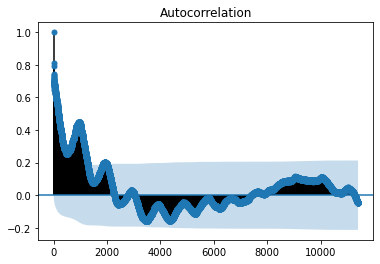

In [133]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(df_cor["N_Max"], lags=11400)
plt.show()

In [134]:
print (f"{1400 * 10 / 60/24} nap")

9.722222222222223 nap


In [135]:
X,y=split_sequences(df_cor,20,1,"N_Max","N_Max")


In [136]:
from keras.layers import InputLayer, Dense, LSTM, Input, Dropout
from keras.models import Sequential, Model
from keras.optimizers import SGD,Adam,Adamax,Nadam,Ftrl,Adadelta,Adagrad,Nadam
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.backend import clear_session
from tensorflow.keras.losses import mean_absolute_percentage_error, huber,kld
#import tensorflow_addons as tfa


In [141]:
input_size=len(X[0])
output_size=len(y[0])
learning_rate=0.005

In [142]:
print(input_size)

20


In [143]:

inputs=Input(shape=(input_size,1))
lstm1=LSTM(52)(inputs)
layer2=Dense(50,activation="linear")(lstm1)
result=Dense(output_size)(layer2)

model = Model(inputs=inputs, outputs=result)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 20, 1)]           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 52)                11232     
_________________________________________________________________
dense_20 (Dense)             (None, 50)                2650      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 51        
Total params: 13,933
Trainable params: 13,933
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    X,y,
    epochs=5,
    batch_size=32,
   
)

Epoch 1/5
1421/1421 [==============================] - 16s 11ms/step - loss: 0.0041
Epoch 2/5
1307/1421 [==========================>...] - ETA: 1s - loss: 0.0041

In [153]:
estimate=model.predict(X)

In [154]:
estimate=[a[0] for a in estimate]
y_orig=[a[0] for a in y]

In [155]:
model_res=pd.DataFrame(data = {"estimate":estimate,"orig":y_orig})

In [156]:
model_res.head()

,estimate,orig
0,0.017930,0.000000
1,0.153636,0.000000
2,0.199096,0.441917
3,0.429925,0.371500
4,0.392675,0.438500


In [159]:
grafikon(model_res[:2000],"estimate","orig","becslés","eredeti")

In [149]:
y

[[0.0],
 [0.0],
 [0.4419166666666666],
 [0.3715],
 [0.43850000000000006],
 [0.2685],
 [0.3846666666666667],
 [0.18491666666666667],
 [0.33266666666666667],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.44741666666666663],
 [0.4043333333333333],
 [0.40008333333333335],
 [0.3869166666666667],
 [0.3526666666666667],
 [0.36933333333333335],
 [0.29233333333333333],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.45625],
 [0.3825],
 [0.4553333333333333],
 [0.25991666666666663],
 [0.3710833333333333],
 [0.15983333333333336],
 [0.33775],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.48758333333333337],
 [0.41025],
 [0.4095],
 [0.33508333333333334],
 [0.3585],
 [0.2555],
 [0.34991666666666665],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.38125],
 [0.46475000000000005],
 [0.41383333333333333],
 [0.39808333333333334],
 [0.40241666666666664],
 [0.33675],
 [0.35550000000000004],
 [0.3080833333333333],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.36875],
 [0.4498333333333333],
 [0.3749166666666666],
 [0.392416666666